## <font color='purple'> Introduction: </font>

In the development of a cancer diagnosis prediction model, I utilized a K-Nearest Neighbors (KNN) classifier with 3 neighbors. My primary goal was to optimize the model to accurately identify cancer cases, reducing the number of false negatives, that represent undetected cancer cases. I focused on improving recall, which measures the model's ability to correctly identify positive cases.


In [269]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [270]:
df = pd.read_csv(r"C:\Users\Teni\Desktop\Git-Github\Datasets\KNN\breast-cancer.csv")

### <font color='black'> Data Info Analysis </font>


In [271]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [273]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [274]:
print(df.diagnosis.unique())

['M' 'B']


In [275]:
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [276]:
df.isnull().sum()

# There are no null data

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:


### <font color='black'> Data Exploratory Analysis </font>



In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

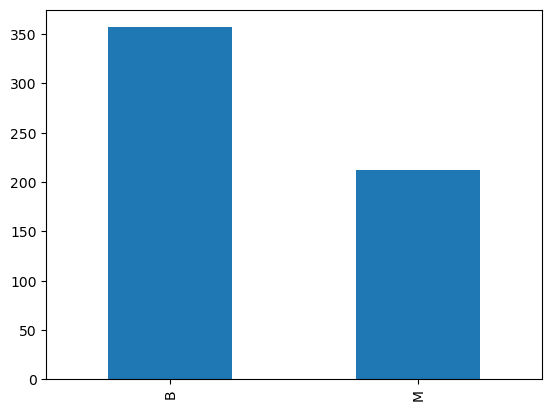

In [278]:
df.diagnosis.value_counts().plot(kind='bar')
plt.show()

In [279]:
diagnosis_mapping = {'M': 1, 'B': 0}

In [280]:
 df.diagnosis = df.diagnosis.map(diagnosis_mapping)

In [281]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [282]:
df.drop(df.columns[-1], axis=1, inplace=True)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


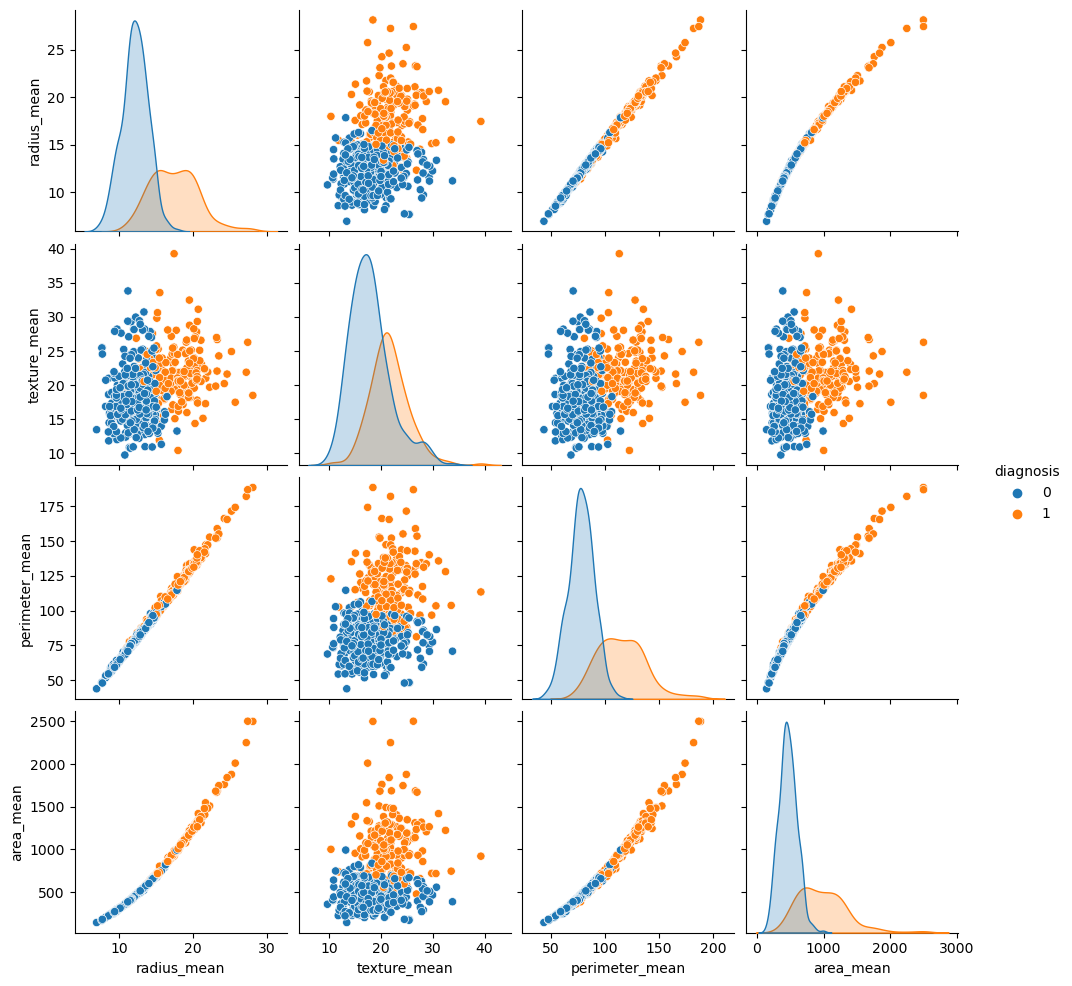

In [283]:
sns.pairplot(df, vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'], hue='diagnosis')
plt.show()


### <font color='black'> Define X and y </font>



In [284]:
X = df.drop('diagnosis', axis=1)
y= df['diagnosis']


### <font color='black'> Train_Test_Split </font>



In [285]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
from sklearn.model_selection import train_test_split

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### <font color='black'> Data Scaling </font>

- Scaling the data because the values in the data are widely apart

In [287]:
from sklearn.preprocessing import StandardScaler

In [288]:
scaler = StandardScaler()

In [289]:
scaled_X_train = scaler.fit_transform(X_train)

In [290]:
scaled_X_test = scaler.transform(X_test)

- model selction

- will be using KNNClassification to identify the ditance/relationship of the variables in forcasting new data enties

- also, will use GridsearchCV

### <font color='black'> Data Modelling </font>


In [291]:
from sklearn.neighbors import KNeighborsClassifier

In [292]:
knn = KNeighborsClassifier(n_neighbors=2)

In [293]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [294]:
y_pred = knn.predict(scaled_X_test)

### <font color='black'> Data Metrics </font>


In [295]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

In [296]:
accuracy_score(y_test, y_pred)

0.9532163742690059

In [297]:
round(accuracy_score(y_test, y_pred), 3)

0.953

In [298]:
confusion_matrix(y_test, y_pred)

array([[107,   1],
       [  7,  56]], dtype=int64)

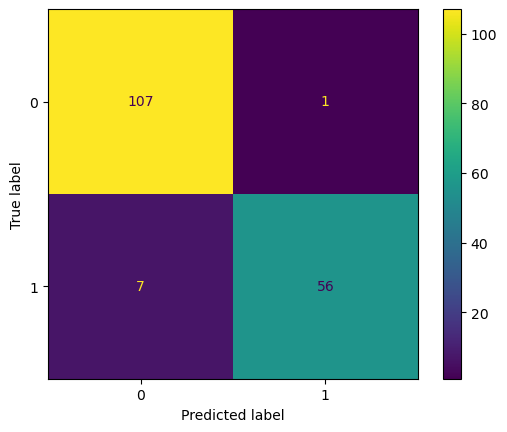

In [299]:
plot_confusion_matrix(knn, scaled_X_test, y_test)

In [300]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.99      0.96       108
           1       0.98      0.89      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



- the metrics for precisiona and recall are different because the data is unbalanced
- It's better to have False Positives than False negatives.
- Finetuning oroptimizing the Recall metric will be at the cost of a lower precision score (which is alriht in our data context)
- Due to the context of the data, need to further optimize the model's ability to significantly minimize false negatives- which means ethe recall would be enhanced.

In [301]:
error_rate = 1-(accuracy_score(y_test, y_pred))

error_rate

0.04678362573099415

#### <font color='black'> Hypertune the parameters to improve the Metrics Score </font>


In [302]:
error_rate = [ ]

for k in range (1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaled_X_train, y_train)
    y_pred = knn.predict(scaled_X_test)

    error = 1-(accuracy_score(y_test, y_pred))

    error_rate.append(error)

In [303]:
error_rate

[0.04678362573099415,
 0.04678362573099415,
 0.040935672514619936,
 0.040935672514619936,
 0.040935672514619936,
 0.03508771929824561,
 0.040935672514619936,
 0.040935672514619936,
 0.0292397660818714,
 0.040935672514619936,
 0.0292397660818714,
 0.040935672514619936,
 0.03508771929824561,
 0.04678362573099415,
 0.040935672514619936,
 0.04678362573099415,
 0.04678362573099415,
 0.04678362573099415,
 0.052631578947368474,
 0.04678362573099415,
 0.052631578947368474,
 0.04678362573099415,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.04678362573099415,
 0.052631578947368474,
 0.04678362573099415,
 0.04678362573099415,
 0.04678362573099415,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.04678362573099415,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.052631578947368474,
 0.0526

Text(0.5, 0, 'range')

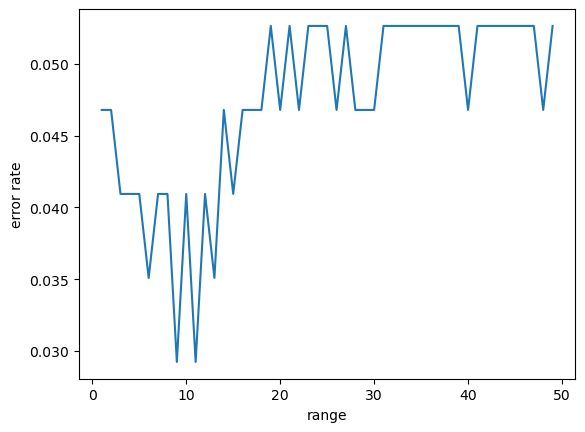

In [304]:
plt.plot(range(1, 50), error_rate)
plt.ylabel('error rate')
plt.xlabel('range')


**Zone in on the graph, since the minimu error rate falls within the KNN range of 9 and 11**

(8.0, 12.0)

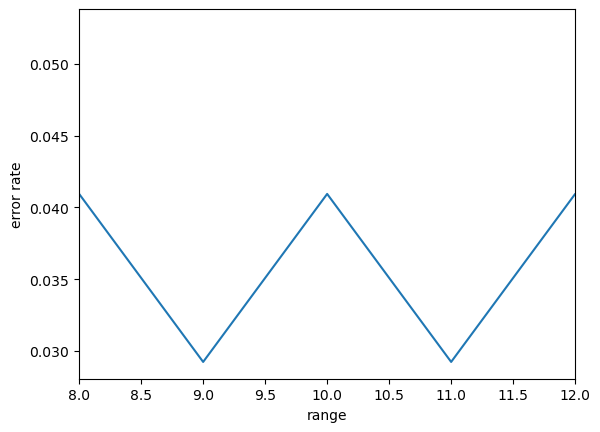

In [305]:
plt.plot(range(1, 50), error_rate)
plt.ylabel('error rate')
plt.xlabel('range')

plt.xlim(8, 12)

In [306]:
knn_2 = KNeighborsClassifier(n_neighbors=9)

knn_2.fit(scaled_X_train, y_train)
y_pred_2 = knn.predict(scaled_X_test)

In [307]:
accuracy_score(y_test, y_pred_2)

0.9473684210526315

In [308]:
round(accuracy_score(y_test, y_pred), 3)

0.947

Since the accuracy has no much diff- leave the knn as it was

#### <font color='black'> Hypertune the parameters using GrodSearchCV to improve the Recall score </font>


In [309]:
scaler = StandardScaler()

In [310]:
knn = KNeighborsClassifier()

In [311]:
operations = [('scaler', scaler), ('knn', knn)]

In [312]:
from sklearn.pipeline import Pipeline

In [313]:
pipe = Pipeline(operations)

In [314]:
from sklearn.model_selection import GridSearchCV

In [315]:
k_values = range(1, 50)

In [316]:
param_grid = {'knn__n_neighbors': k_values}

In [317]:
from sklearn.metrics import make_scorer, recall_score

In [318]:
scorer= make_scorer(recall_score)

In [319]:
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring=scorer)

In [320]:
full_cv_classifier.fit(scaled_X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 50)},
             scoring=make_scorer(recall_score))

In [321]:
full_cv_classifier.predict(scaled_X_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

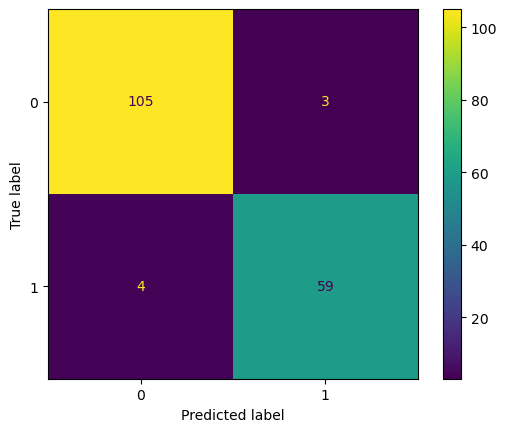

In [322]:
plot_confusion_matrix(full_cv_classifier, scaled_X_test, y_test)

In [323]:
full_cv_classifier.best_params_

{'knn__n_neighbors': 3}

In [324]:
full_cv_classifier.best_score_

0.9062068965517242

- The best knn value from the range using GridsearchCV is 3


## <font color='purple'> Conclusion: </font>

Through careful adjustments, I improved the model's performance significantly. I reduced false negatives from 7 to 4, ensuring more cancer cases were correctly identified. Additionally, precision increased from 1 to 3, meaning the model made fewer incorrect positive predictions. Overall, my refined model is more reliable for early cancer detection. These improvements not only enhance the model's accuracy but also its potential utility in clinical settings for better patient outcomes.